In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
REAL_LABEL, FAKE_LABEL = 1, 0
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [3]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterionD = nn.BCELoss().to(device)
criterionG = nn.MSELoss(reduction='mean').to(device)

G_losses, D_losses = [], []

Feature matching changes the cost function for the generator to minimize the statistical difference between the features of the real images and the generated images.

Often, we measure the L2-distance between the means of their feature vectors.

Therefore, feature matching expands the goal from beating the opponent to matching features in real images.

OBJECTIVE FUNCTION:
<img src='https://miro.medium.com/max/1400/1*7ZM4HlUE81WyvxXZVhprrw.png'>

In [4]:
def train(num_epochs = 1):

    label_real = torch.full((BATCH_SIZE,), REAL_LABEL, device=device, dtype=torch.float)
    label_fake = torch.full((BATCH_SIZE,), FAKE_LABEL, device=device, dtype=torch.float)

    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            netD.zero_grad()
            data_real = data[0].to(device)
            output_real = netD(data_real).view(-1)
            errD_real = criterionD(output_real, label_real)
            errD_real.backward()
            D_x = output_real.mean().item()

            noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
            data_fake = netG(noise)
            output_fake = netD(data_fake.detach()).view(-1)
            errD_fake = criterionD(output_fake, label_fake)
            errD_fake.backward()
            D_G_z1 = output_fake.mean().item()

            errD = errD_real + errD_fake
            optimizerD.step()

            # ===============TRAIN_GENERATOR===============
            netG.zero_grad()
            fx = netD(data_real, mode='last_feature')
            fgz = netD(data_fake, mode='last_feature')
            mean_fx = torch.mean(fx, 0).detach()
            mean_fgz = torch.mean(fgz, 0)
            errG = criterionG(mean_fx, mean_fgz)

            errG.backward()
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f'
                      % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1))

            G_losses.append(errG.item())
            D_losses.append(errD.item())


## TRAINING PROCESS

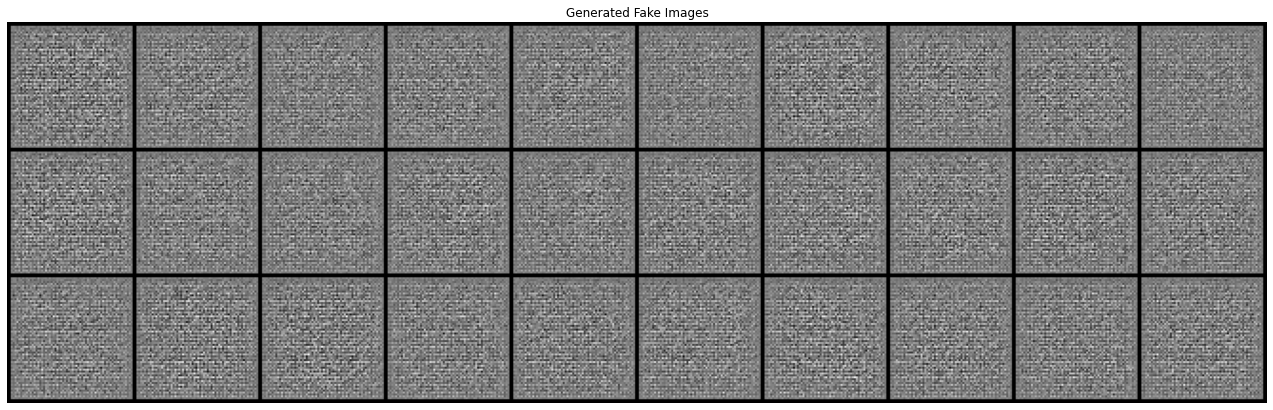

In [5]:
generate_images(netG)

In [6]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 2.3564   Loss_G: 0.1076   D(x): 0.2020   D(G(z)): 0.2413
[100/468]   Loss_D: 0.0486   Loss_G: 0.0196   D(x): 0.9829   D(G(z)): 0.0293
[200/468]   Loss_D: 0.0486   Loss_G: 0.0145   D(x): 0.9836   D(G(z)): 0.0305
[300/468]   Loss_D: 0.0311   Loss_G: 0.0149   D(x): 0.9897   D(G(z)): 0.0201
[400/468]   Loss_D: 0.1010   Loss_G: 0.0083   D(x): 0.9632   D(G(z)): 0.0587
   EPOCH:  1
[000/468]   Loss_D: 0.0491   Loss_G: 0.0102   D(x): 0.9852   D(G(z)): 0.0323
[100/468]   Loss_D: 0.0245   Loss_G: 0.0131   D(x): 0.9864   D(G(z)): 0.0104
[200/468]   Loss_D: 0.1194   Loss_G: 0.0091   D(x): 0.9443   D(G(z)): 0.0557
[300/468]   Loss_D: 0.0297   Loss_G: 0.0118   D(x): 0.9797   D(G(z)): 0.0088
[400/468]   Loss_D: 0.4085   Loss_G: 0.0052   D(x): 0.7816   D(G(z)): 0.1302
   EPOCH:  2
[000/468]   Loss_D: 0.0615   Loss_G: 0.0108   D(x): 0.9710   D(G(z)): 0.0294
[100/468]   Loss_D: 0.0257   Loss_G: 0.0146   D(x): 0.9900   D(G(z)): 0.0152
[200/468]   Loss_D: 0.5828   Loss_G: 

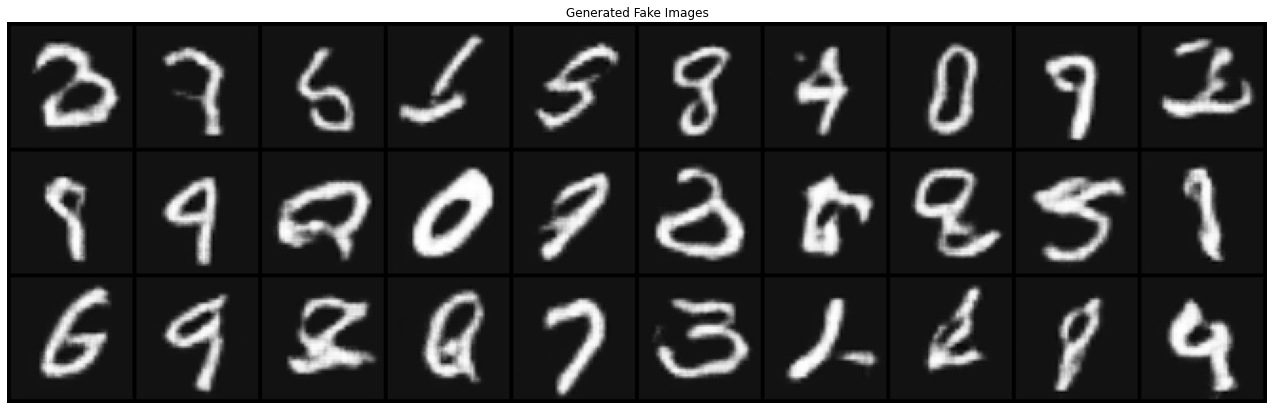

In [7]:
generate_images(netG)

In [8]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0770   Loss_G: 0.0079   D(x): 0.9854   D(G(z)): 0.0509
[100/468]   Loss_D: 0.0085   Loss_G: 0.0132   D(x): 0.9946   D(G(z)): 0.0029
[200/468]   Loss_D: 0.0047   Loss_G: 0.0195   D(x): 0.9987   D(G(z)): 0.0032
[300/468]   Loss_D: 0.2487   Loss_G: 0.0053   D(x): 0.9681   D(G(z)): 0.1632
[400/468]   Loss_D: 0.0169   Loss_G: 0.0119   D(x): 0.9864   D(G(z)): 0.0030
   EPOCH:  1
[000/468]   Loss_D: 0.0029   Loss_G: 0.0185   D(x): 0.9987   D(G(z)): 0.0016
[100/468]   Loss_D: 0.4423   Loss_G: 0.0045   D(x): 0.7592   D(G(z)): 0.0856
[200/468]   Loss_D: 0.4407   Loss_G: 0.0045   D(x): 0.9870   D(G(z)): 0.2730
[300/468]   Loss_D: 0.0676   Loss_G: 0.0082   D(x): 0.9597   D(G(z)): 0.0234
[400/468]   Loss_D: 0.1034   Loss_G: 0.0071   D(x): 0.9353   D(G(z)): 0.0266
   EPOCH:  2
[000/468]   Loss_D: 0.0346   Loss_G: 0.0094   D(x): 0.9759   D(G(z)): 0.0090
[100/468]   Loss_D: 0.0163   Loss_G: 0.0099   D(x): 0.9964   D(G(z)): 0.0121
[200/468]   Loss_D: 0.0151   Loss_G: 

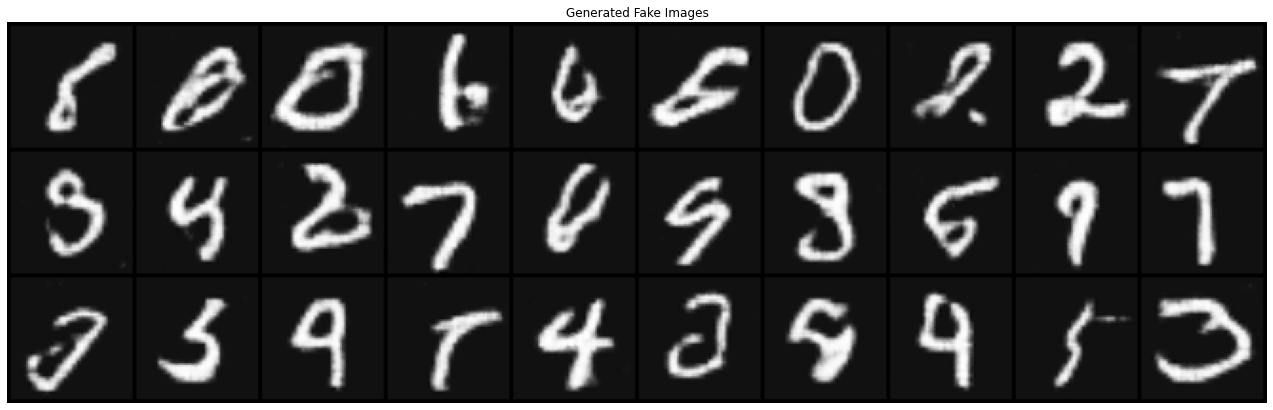

In [9]:
generate_images(netG)

In [10]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.2202   Loss_G: 0.0050   D(x): 0.8636   D(G(z)): 0.0392
[100/468]   Loss_D: 0.0592   Loss_G: 0.0079   D(x): 0.9705   D(G(z)): 0.0237
[200/468]   Loss_D: 0.0266   Loss_G: 0.0085   D(x): 0.9884   D(G(z)): 0.0138
[300/468]   Loss_D: 0.0811   Loss_G: 0.0060   D(x): 0.9705   D(G(z)): 0.0441
[400/468]   Loss_D: 0.2270   Loss_G: 0.0045   D(x): 0.9132   D(G(z)): 0.1113
   EPOCH:  1
[000/468]   Loss_D: 0.0369   Loss_G: 0.0067   D(x): 0.9818   D(G(z)): 0.0174
[100/468]   Loss_D: 0.0222   Loss_G: 0.0114   D(x): 0.9808   D(G(z)): 0.0021
[200/468]   Loss_D: 0.0098   Loss_G: 0.0115   D(x): 0.9936   D(G(z)): 0.0032
[300/468]   Loss_D: 0.0190   Loss_G: 0.0100   D(x): 0.9858   D(G(z)): 0.0041
[400/468]   Loss_D: 0.0154   Loss_G: 0.0090   D(x): 0.9871   D(G(z)): 0.0020
   EPOCH:  2
[000/468]   Loss_D: 0.0078   Loss_G: 0.0103   D(x): 0.9951   D(G(z)): 0.0028
[100/468]   Loss_D: 0.0091   Loss_G: 0.0090   D(x): 0.9943   D(G(z)): 0.0033
[200/468]   Loss_D: 0.0082   Loss_G: 

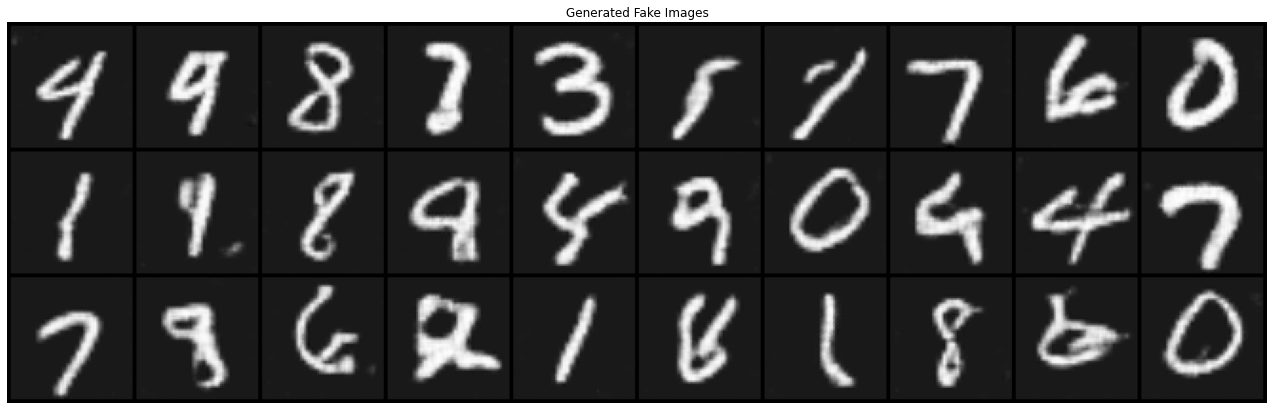

In [11]:
generate_images(netG)

In [12]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0464   Loss_G: 0.0058   D(x): 0.9748   D(G(z)): 0.0183
[100/468]   Loss_D: 0.0208   Loss_G: 0.0076   D(x): 0.9967   D(G(z)): 0.0168
[200/468]   Loss_D: 0.0236   Loss_G: 0.0082   D(x): 0.9964   D(G(z)): 0.0189
[300/468]   Loss_D: 0.0170   Loss_G: 0.0070   D(x): 0.9869   D(G(z)): 0.0036
[400/468]   Loss_D: 0.0160   Loss_G: 0.0081   D(x): 0.9968   D(G(z)): 0.0123
   EPOCH:  1
[000/468]   Loss_D: 0.0017   Loss_G: 0.0129   D(x): 0.9986   D(G(z)): 0.0004
[100/468]   Loss_D: 0.0111   Loss_G: 0.0094   D(x): 0.9902   D(G(z)): 0.0010
[200/468]   Loss_D: 0.0079   Loss_G: 0.0083   D(x): 0.9934   D(G(z)): 0.0012
[300/468]   Loss_D: 0.5272   Loss_G: 0.0029   D(x): 0.9259   D(G(z)): 0.3123
[400/468]   Loss_D: 0.2208   Loss_G: 0.0046   D(x): 0.9006   D(G(z)): 0.0927
   EPOCH:  2
[000/468]   Loss_D: 0.2710   Loss_G: 0.0057   D(x): 0.8383   D(G(z)): 0.0478
[100/468]   Loss_D: 0.0983   Loss_G: 0.0084   D(x): 0.9661   D(G(z)): 0.0533
[200/468]   Loss_D: 0.1054   Loss_G: 

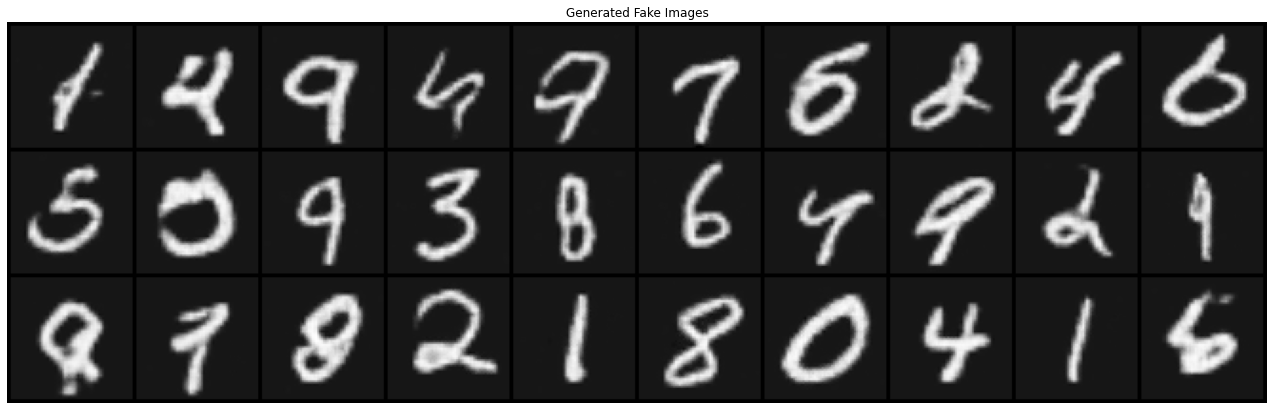

In [13]:
generate_images(netG)

In [14]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.6344   Loss_G: 0.0050   D(x): 0.6351   D(G(z)): 0.0006
[100/468]   Loss_D: 0.0364   Loss_G: 0.0064   D(x): 0.9828   D(G(z)): 0.0177
[200/468]   Loss_D: 0.0677   Loss_G: 0.0060   D(x): 0.9959   D(G(z)): 0.0563
[300/468]   Loss_D: 0.0324   Loss_G: 0.0063   D(x): 0.9940   D(G(z)): 0.0251
[400/468]   Loss_D: 0.0175   Loss_G: 0.0082   D(x): 0.9972   D(G(z)): 0.0143
   EPOCH:  1
[000/468]   Loss_D: 0.0290   Loss_G: 0.0073   D(x): 0.9849   D(G(z)): 0.0117
[100/468]   Loss_D: 0.0394   Loss_G: 0.0060   D(x): 0.9787   D(G(z)): 0.0151
[200/468]   Loss_D: 0.0018   Loss_G: 0.0124   D(x): 0.9983   D(G(z)): 0.0002
[300/468]   Loss_D: 0.0046   Loss_G: 0.0114   D(x): 0.9974   D(G(z)): 0.0020
[400/468]   Loss_D: 0.0059   Loss_G: 0.0084   D(x): 0.9975   D(G(z)): 0.0034
   EPOCH:  2
[000/468]   Loss_D: 0.5620   Loss_G: 0.0026   D(x): 0.8978   D(G(z)): 0.3167
[100/468]   Loss_D: 0.3839   Loss_G: 0.0037   D(x): 0.9489   D(G(z)): 0.2382
[200/468]   Loss_D: 0.1989   Loss_G: 

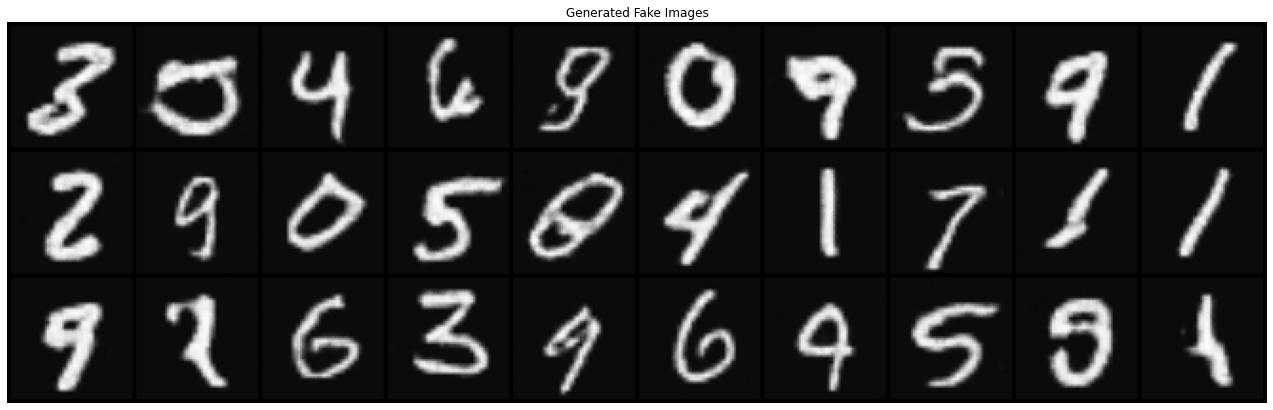

In [15]:
generate_images(netG)

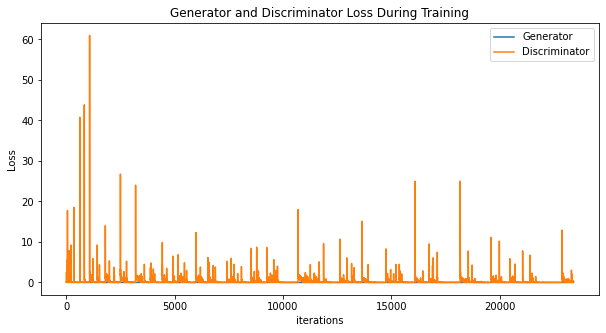

In [16]:
plot_losses(G_losses, D_losses)